In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.width', None)


In [5]:
file_path = '/Users/anton/Downloads/data.xlsx'


In [50]:
df = pd.read_excel(file_path)

In [174]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
client_id,724.0,183.084254,6.0,86.0,194.0,273.0,398.0,106.590761
sum,724.0,7162.54203,23.7,3114.7325,5207.99,8934.95,39713.5,6308.571297
receiving_date,606,2021-08-25 11:33:51.683168256,2021-05-18 00:00:00,2021-07-16 00:00:00,2021-08-25 00:00:00,2021-10-06 00:00:00,2021-11-15 00:00:00,NaN


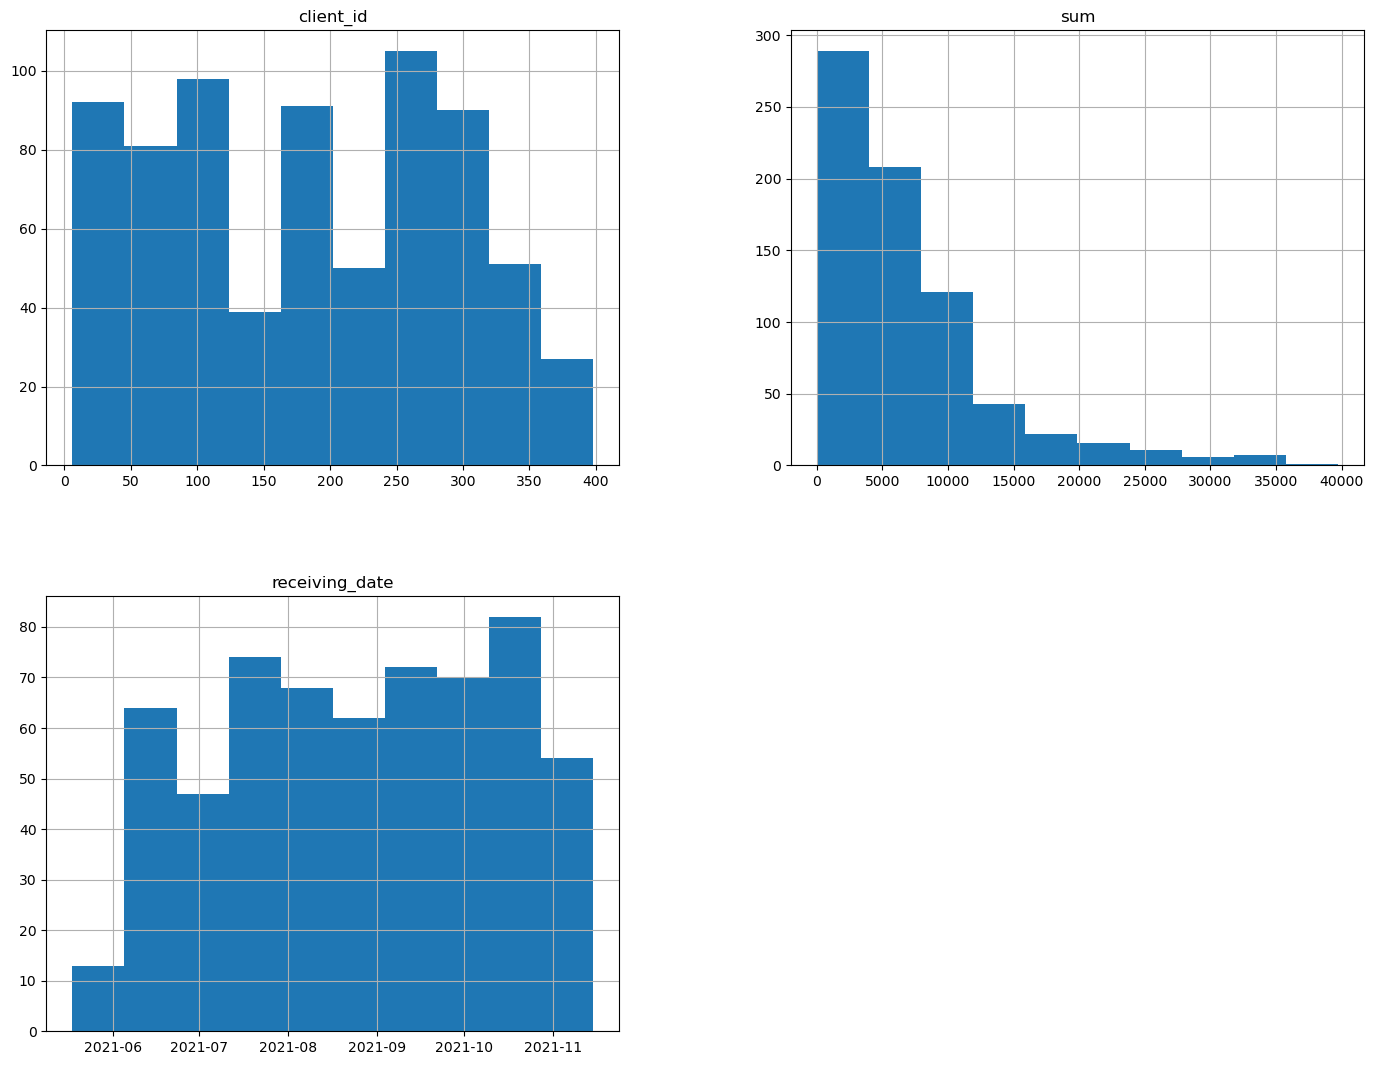

In [176]:
p = df.hist(figsize = (17,13))

In [178]:
df.isnull().sum()

client_id           6
sum                 6
status              0
sale                6
new_current         6
document           21
receiving_date    124
deal_month          6
dtype: int64

In [175]:
df.duplicated().sum()

14

In [52]:
df.columns = ['client_id', 'sum', 'status', 'sale', 'new_current', 'Unnamed', 'document', 'receiving_date']
df = df.drop(columns=['Unnamed'])

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       724 non-null    float64       
 1   sum             724 non-null    float64       
 2   status          730 non-null    object        
 3   sale            724 non-null    object        
 4   new_current     724 non-null    object        
 5   document        709 non-null    object        
 6   receiving_date  606 non-null    datetime64[ns]
 7   deal_month      724 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 45.8+ KB


In [157]:
df.shape

(730, 8)

## 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [53]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce')

/var/folders/9h/gmnvxz2112dg5zpftrkg0td40000gn/T/ipykernel_36943/870839572.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce')


In [24]:
df['client_id'] = df['client_id'].fillna(method='ffill')

/var/folders/9h/gmnvxz2112dg5zpftrkg0td40000gn/T/ipykernel_36943/4273359886.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['client_id'] = df['client_id'].fillna(method='ffill')


In [54]:
df['deal_month'] = np.nan

In [55]:
current_month = None

for i, row in df.iterrows():
    # Если client_id пустой и в статусе есть месяц (например, 'Май 2021' или 'Июнь 2021')
    if pd.isna(row['client_id']) and isinstance(row['status'], str):
        current_month = row['status']  # Обновляем текущий месяц
        print(current_month)
    else:
        df.at[i, 'deal_month'] = current_month

Май 2021
Июнь 2021
Июль 2021
Август 2021
Сентябрь 2021
Октябрь 2021


/var/folders/9h/gmnvxz2112dg5zpftrkg0td40000gn/T/ipykernel_36943/2470558376.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Май 2021' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[i, 'deal_month'] = current_month


In [57]:
df.sample(20)

,client_id,sum,status,sale,new_current,document,receiving_date,deal_month
387,42.0,6223.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-09,Август 2021
518,293.0,12587.70,ОПЛАЧЕНО,Смирнов,новая,НЕТ,NaT,Сентябрь 2021
424,164.0,4221.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-30,Август 2021
201,130.0,2884.95,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-02,Июнь 2021
729,286.0,3978.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-11-15,Октябрь 2021
16,40.0,6493.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-15,Май 2021
284,291.0,13753.70,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-08-24,Июль 2021
172,84.0,1673.70,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-13,Июнь 2021
629,85.0,9023.70,В РАБОТЕ,Соколов,текущая,НЕТ,NaT,Октябрь 2021
227,211.0,6953.70,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-07-19,Июнь 2021


In [58]:
df_filtered = df[(df['deal_month'] == 'Июль 2021') & (df['status'] == 'ОПЛАЧЕНО')]

In [150]:
df_filtered.sample(5)

,client_id,sum,status,sale,new_current,document,receiving_date,deal_month
281,49.0,7203.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-06,Июль 2021
291,87.0,14143.7,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-08-09,Июль 2021
276,45.0,2798.7,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-08-06,Июль 2021
343,247.0,5009.6,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-08-23,Июль 2021
277,318.0,493.7,ОПЛАЧЕНО,Смирнов,новая,оригинал,2021-08-06,Июль 2021


In [60]:
total_revenue = df_filtered['sum'].sum()

In [61]:
total_revenue

859896.4699999997

## 2)Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [84]:
df_paid = df[df['status'] == 'ОПЛАЧЕНО']
monthly_revenue = df_paid.groupby('deal_month')['sum'].sum().reset_index()


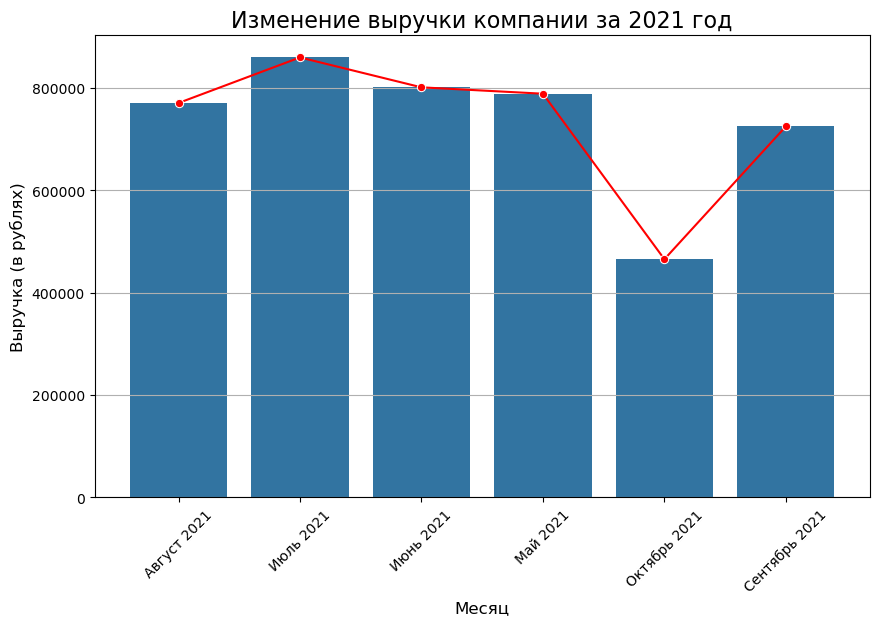

In [94]:
monthly_revenue.columns = ['Месяц', 'Выручка']

plt.figure(figsize=(10, 6))
sns.barplot(x='Месяц', y='Выручка', data=monthly_revenue)
sns.lineplot(x='Месяц', y='Выручка', data=monthly_revenue, marker='o', color='red')

plt.title('Изменение выручки компании за 2021 год', fontsize=16)
plt.ylabel('Выручка (в рублях)', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## 3)Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [95]:
df_september = df[(df['deal_month'] == 'Сентябрь 2021') & (df['status'] == 'ОПЛАЧЕНО')]

In [96]:
manager_revenue = df_september.groupby('sale')['sum'].sum().reset_index()

In [97]:
top_manager = manager_revenue.loc[manager_revenue['sum'].idxmax()]

top_manager

sale     Смирнов
sum     205258.3
Name: 6, dtype: object

## 4)Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [110]:
df_october = df[(df['deal_month'] == 'Октябрь 2021')]

deal_type_count = df_october['new_current'].value_counts()

dominant_deal_type = deal_type_count.idxmax()

print(f'Преобладает вид сделок "{dominant_deal_type}"') 
deal_type_count

Преобладает вид сделок "текущая"


new_current
текущая    99
новая      36
Name: count, dtype: int64

## 5)Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [112]:
# Фильтруем майские сделки (Май 2021)
df_may = df[df['deal_month'] == 'Май 2021']

df_may_june_docs = df_may[df_may['receiving_date'].between('2021-06-01', '2021-06-30')]

received_in_june_count = df_may_june_docs.shape[0]

received_in_june_count


77

## Задание:
За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [165]:
df_before_july = df[df['deal_month'].isin(['Май 2021', 'Июнь 2021'])]


In [166]:
df_with_late_receiving = df_before_july[df_before_july['receiving_date'] > pd.to_datetime('2021-06-30')].copy()

In [167]:
def calculate_bonus(row):
    if row['new_current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО' and pd.notna(row['document']):
        return 0.07 * row['sum']  
    elif row['new_current'] == 'текущая' and row['status'] != 'ПРОСРОЧЕНО' and pd.notna(row['document']):
        if row['sum'] > 10000:
            return 0.05 * row['sum'] 
        else:
            return 0.03 * row['sum']  
    return 0  

In [168]:
df_with_late_receiving['bonus'] = np.nan

In [169]:
df_with_late_receiving['bonus'] = df_with_late_receiving['bonus'].astype(float)

In [170]:
df_with_late_receiving.loc[:, 'bonus'] = df_with_late_receiving.apply(calculate_bonus, axis=1)

In [171]:
manager_bonus_remaining = df_with_late_receiving.groupby('sale')['bonus'].sum().reset_index()

In [172]:
manager_bonus_remaining

,sale,bonus
0,Андреев,3945.8297
1,Васильев,1037.0490
2,Иванов,5991.4520
3,Кузнецова,4496.9501
4,Петрова,10770.7474
5,Селиванов,5297.6900
6,Смирнов,6430.2650
7,Соколов,269.2110
8,Филимонова,2317.9579
